## **Zadanie 6 - Q-learning**
Cel zadania polega na implementacji algorytmu Q-learning oraz zastosowaniu go do rozwiązania problemu [Cliff Walking](https://gymnasium.farama.org/environments/toy_text/cliff_walking/). Środowisko to jest dostępne w pakiecie gymnasium `(gym.make('CliffWalking-v0')`.

**Kroki do wykonania:**
1. Implementacja algorytmu Q-learning.
2. Zbadanie skuteczności działania algorytmu dla problemu Cliff Walking dla różnych wartości współczynnika uczenia i różnej liczby epizodów (w procesie trenowania).

**Uwagi:**
- Implementacja algorytmu powinna być uniwersalna, tzn. możliwa do wykorzystania dla różnych środowisk o dyskretnej przestrzeni stanów i akcji.

In [213]:
from time import sleep
from IPython.display import  clear_output

import numpy as np
import gymnasium as gym
from matplotlib import pyplot as plt
from typing import List

In [195]:
env = gym.make("CliffWalking-v0", render_mode="rgb_array")

### **Implementacja algorytmu Q-learning**

**Wybór akcji metodą epsilon-zachłanną**

In [197]:
def choose_action(Q: np.ndarray, state: int, epsilon: float) -> int:
    if np.random.uniform(0, 1) < epsilon:
        return env.action_space.sample()
    else:
        max_value = np.max(Q[state])
        max_keys = np.where(Q[state] == max_value)[0]
        return np.random.choice(max_keys)

**Implementacja procesu trenowania algorytmu Q-learning**

In [215]:
def train_q_learning(env, beta=0.1, gamma=0.99, epsilon=0.1, max_episodes=5_000, max_steps=1000):
    Q = np.zeros((env.observation_space.n, env.action_space.n))

    training_rewards = []

    for _ in range(max_episodes):
        state, _ = env.reset()

        steps_counter = 0

        reward_per_episode = 0

        while steps_counter < max_steps:
            action = choose_action(Q, state, epsilon)
            next_state, reward, done, _,_ = env.step(action)

            Q[state, action] += beta * (reward + gamma * np.max(Q[next_state]) - Q[state, action])

            state = next_state

            steps_counter += 1
            reward_per_episode += reward

            if done:
                break

        training_rewards.append(reward_per_episode)

    return Q, training_rewards

**Implementacja procesu testowania algorytmu Q-learning**

In [216]:
def test_q_learning(env: gym.Env, Q: np.ndarray, max_steps=1000):
    print("Testing Q-learning")
    state, _ = env.reset()
    env.render()
    total_reward = 0
    step_counter = 0
    while step_counter < max_steps:
        action = np.argmax(Q[state])
        state, reward, done, _, _ = env.step(action)
        env.render()
        total_reward += reward
        if done:
            break
        step_counter += 1
    print("Total reward:", total_reward)

### **Wizuwalizacja wyników**

**Wizualizacja wyników nagród w kolejnych epizodach**

In [205]:
def visualize_rewards_per_episode(rewards_per_episode, beta, episodes_num):
    plt.plot(rewards_per_episode)
    plt.xlabel("Epizod")
    plt.ylabel("Nagroda")
    plt.title(f"Zależność nagrody od epizodu dla beta={beta}, liczba epizodów={episodes_num}")
    plt.show()

**Wizualizacja środowiska oraz strategii działania agenta**

In [210]:
def get_all_steps(env: gym.Env, Q: np.ndarray):
    env.reset()
    env.render()
    total_reward = 0
    state, _ = env.reset()

    frames = []

    while True:
        action = np.argmax(Q[state])
        state, reward, done, _, _ = env.step(action)
        frames.append({
            "frame": env.render(),
            "state": state,
            "action": action,
            "reward": reward
        })
        total_reward += reward
        if done:
            break
    return frames

In [214]:
def print_frames(frames: List[dict]):
    for _, frame in enumerate(frames):
        clear_output(wait=True)
        print(frame["state"])
        print(f"Akcja: {frame['action']}")
        print(f"Nagroda: {frame['reward']}")
        plt.imshow(frame["frame"])
        plt.show()
        sleep(0.5)

### **Eksperymenty**

**Wartość nagrody w kolejnych epizodach dla strategii losowej (epsilon=1)**

In [217]:
Q_random, rewards_random = train_q_learning(env, epsilon=0.1, max_episodes=2_000)

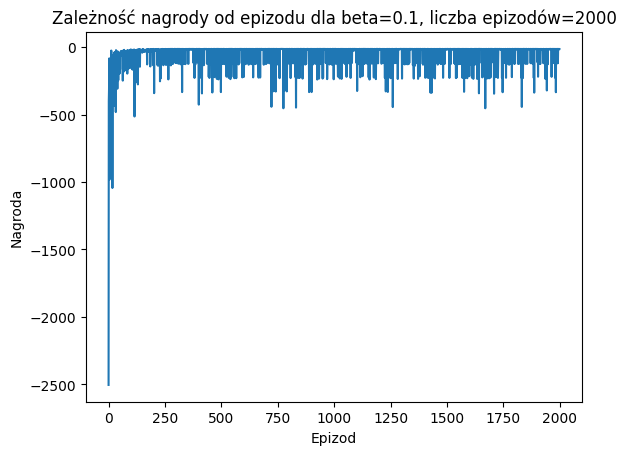

In [218]:
visualize_rewards_per_episode(rewards_random, beta=0.1, episodes_num=2_000)

**Wartość nagrody w kolejnych epizodach dla strategii epsilon-zachłannej (epsilon=0.1) dla różnych wartości współczynnika uczenia i liczby epizodów**

In [219]:
BETA_VALUES = [0.1, 0.3, 0.5, 0.7, 0.9]
EPISODES_VALUES = [500, 1000, 5000, 10000]

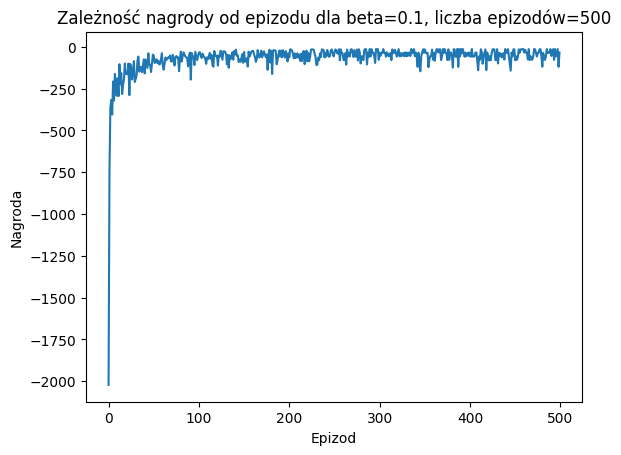

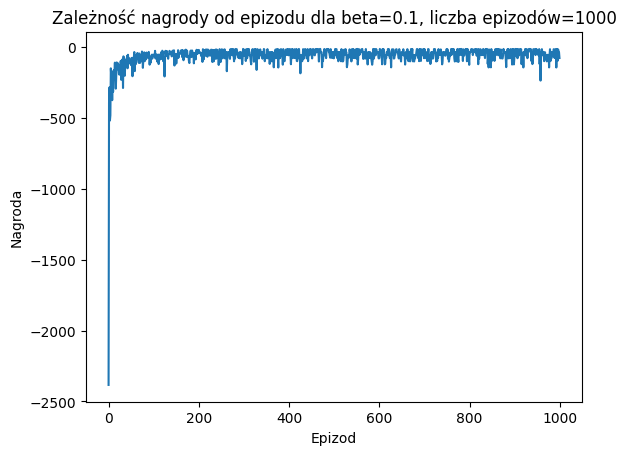

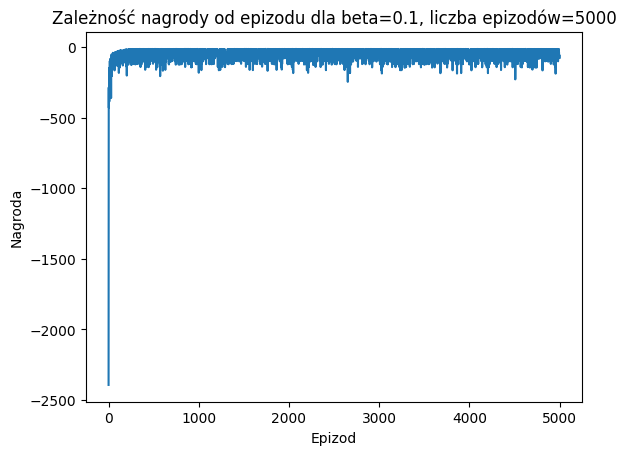

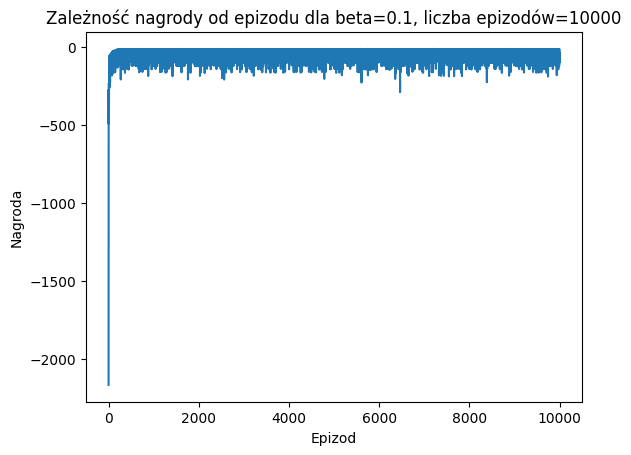

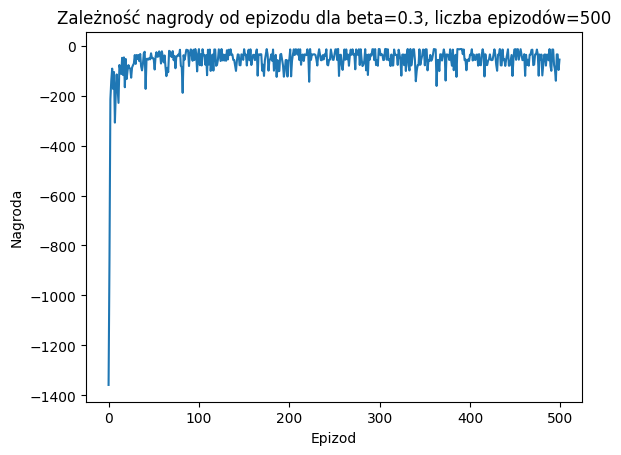

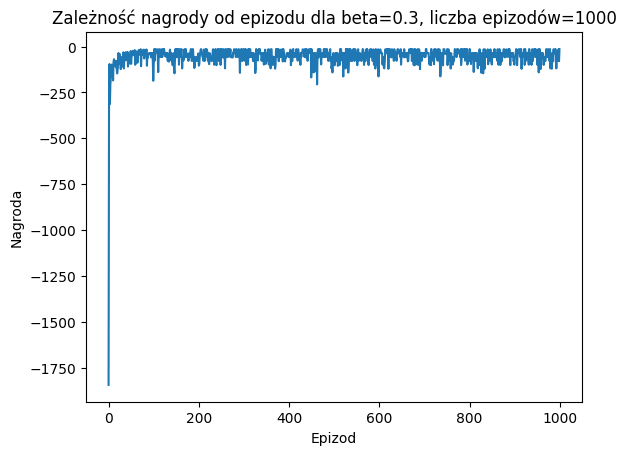

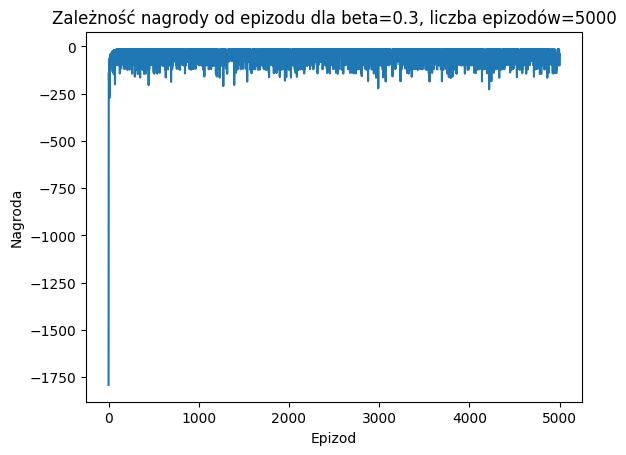

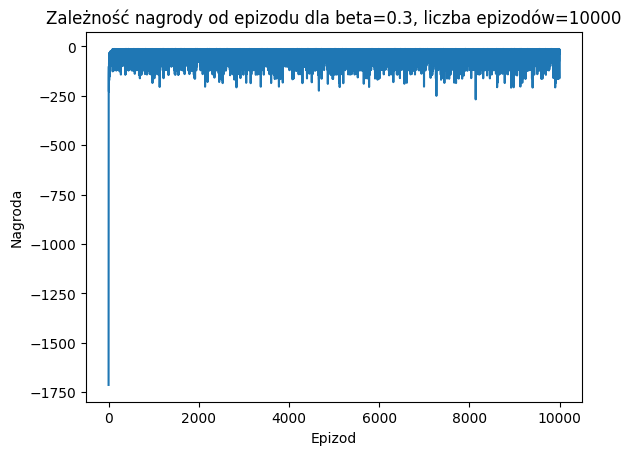

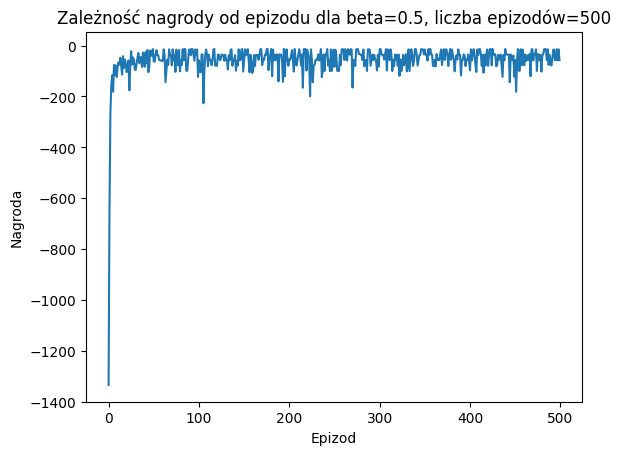

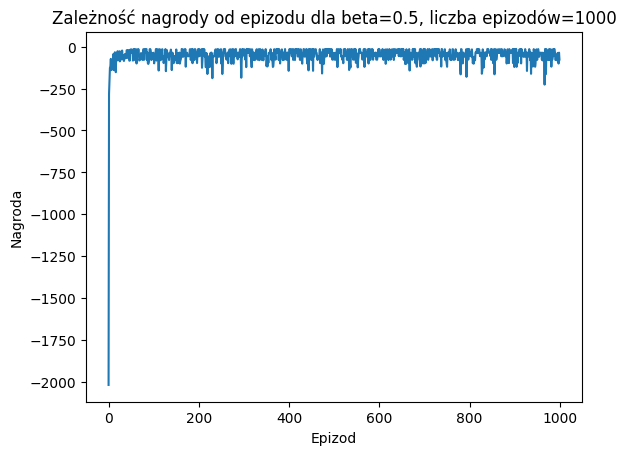

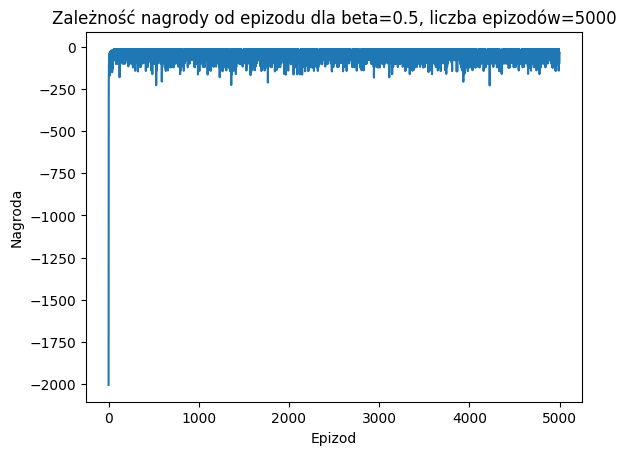

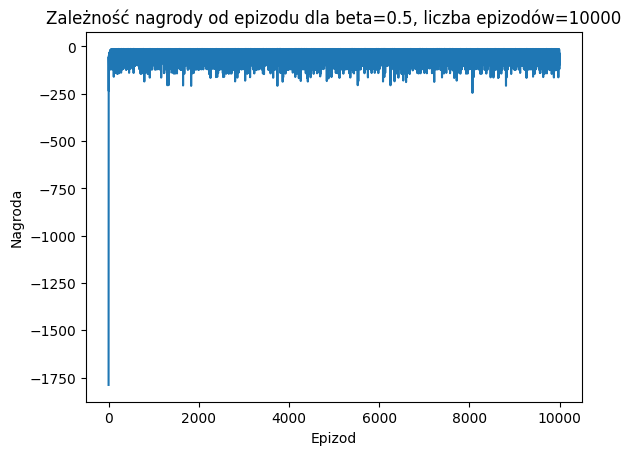

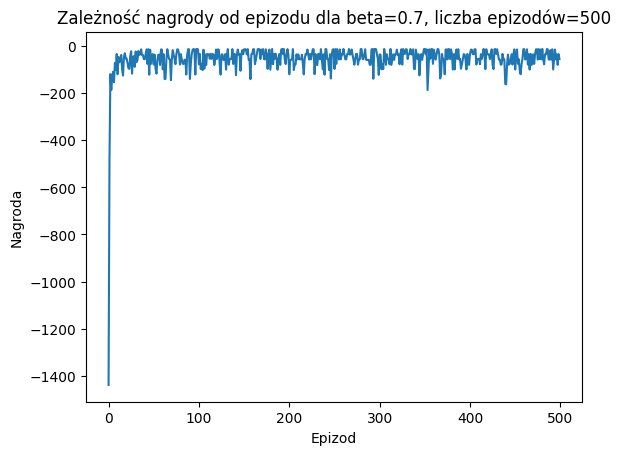

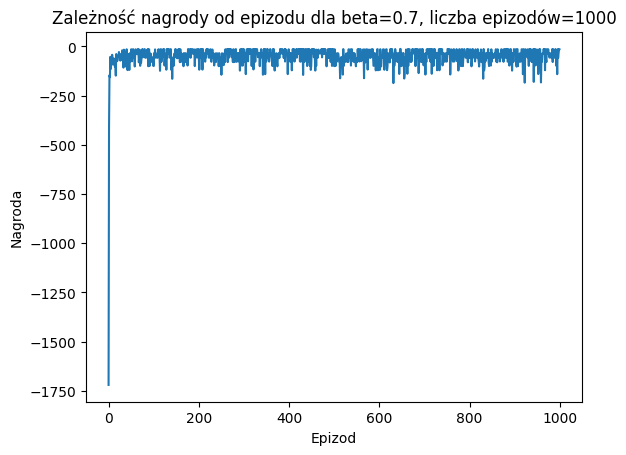

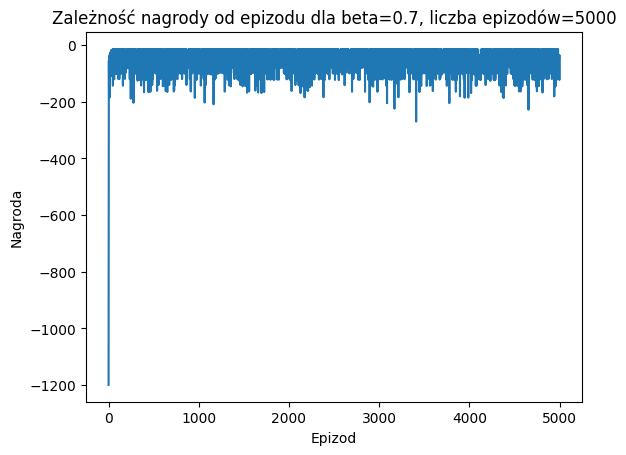

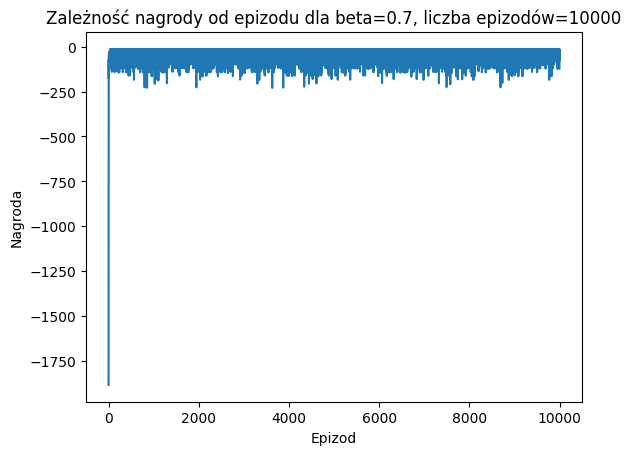

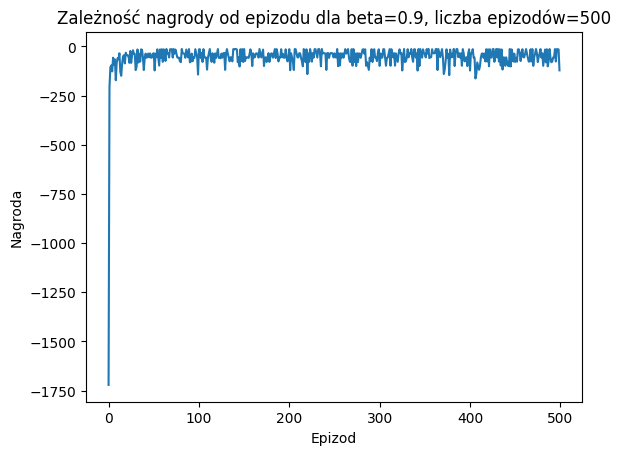

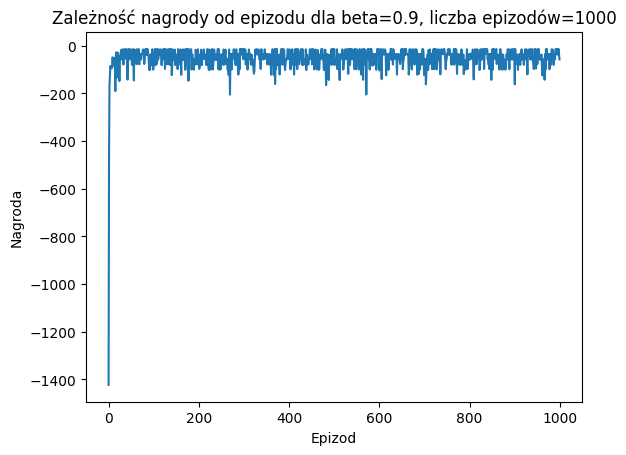

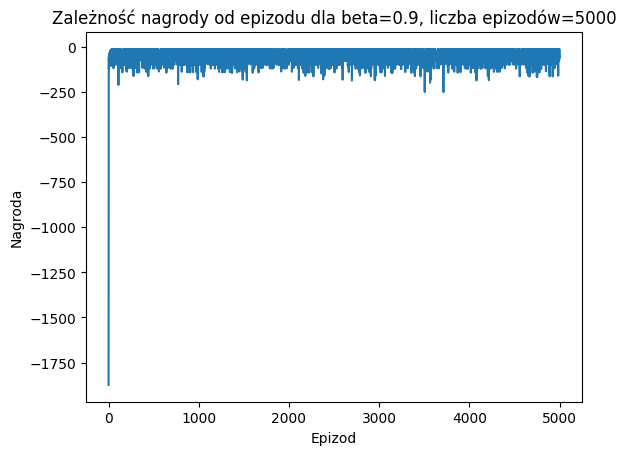

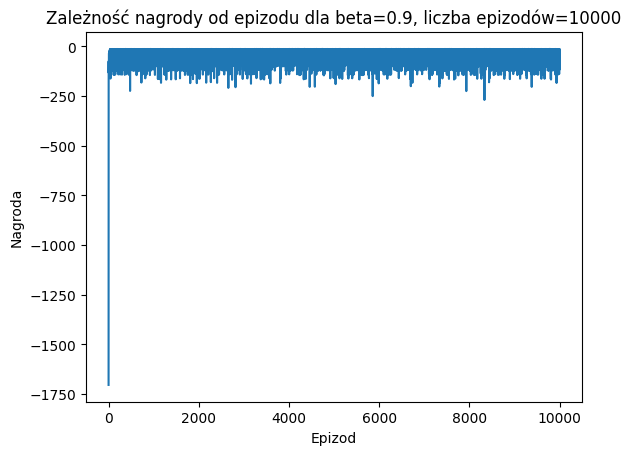

In [222]:
for beta in BETA_VALUES:
    for episodes in EPISODES_VALUES:
        res = []
        for _ in range(5):
            res.append(train_q_learning(env, beta=beta, max_episodes=episodes)[1])
        # visualize mean rewards per episode
        visualize_rewards_per_episode(np.mean(res, axis=0), beta, episodes)

**Przykładowa wizualizacja środowiska oraz strategii działania agenta**

47
Akcja: 2
Nagroda: -1


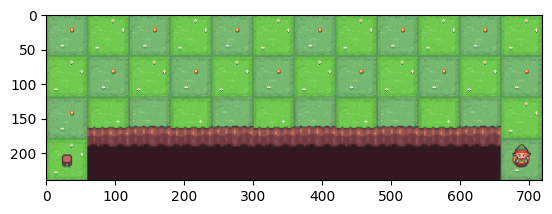

In [223]:
frames = get_all_steps(env, Q_random)
print_frames(frames)